In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/sample_data/diabetes_prediction_dataset.csv')

print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())


Dataset Shape: (100000, 9)

First 5 rows:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
# Visualization

Percentage of diabetes cases: 8.50%


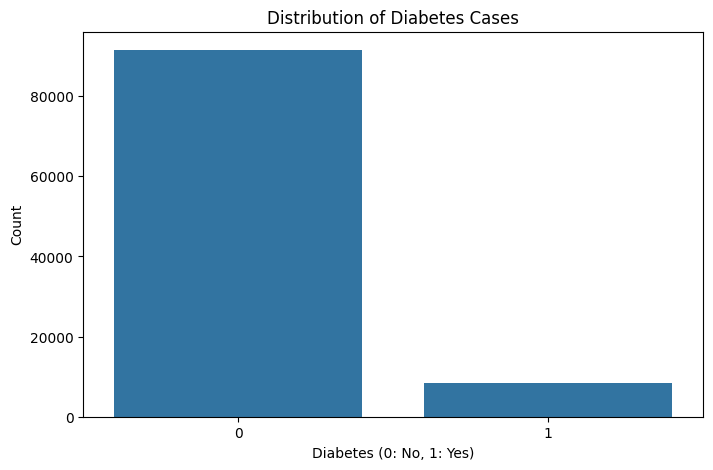

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='diabetes', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('Count')
print(f"Percentage of diabetes cases: {df['diabetes'].mean()*100:.2f}%")

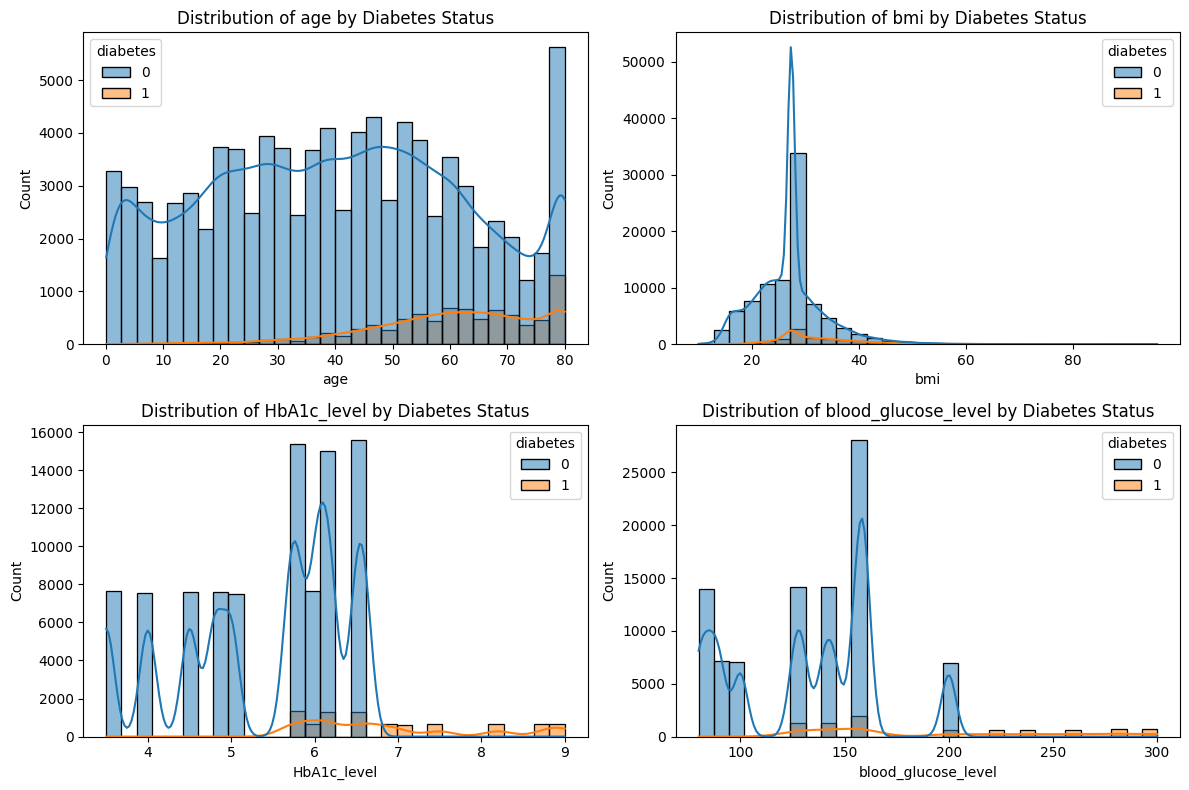

In [ ]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue='diabetes', bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Diabetes Status')

plt.tight_layout()

In [ ]:
# Data Preprocessing

In [ ]:
df_processed = df.copy()

df_processed['gender'] = df_processed['gender'].map({'Male': 1, 'Female': 0})

if df_processed['gender'].isnull().sum() > 0:
    gender_mode = df_processed['gender'].mode()[0]
    df_processed['gender'] = df_processed['gender'].fillna(gender_mode)

df_processed = pd.get_dummies(df_processed, columns=['smoking_history'], drop_first=False)

print("Missing values after preprocessing:")
print(df_processed.isnull().sum().sum())

Missing values after preprocessing:
0


In [ ]:
# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

X = df_processed.drop('diabetes', axis=1)
y = df_processed['diabetes']

numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

X_standard_scaled = X.copy()
X_minmax_scaled = X.copy()
X_robust_scaled = X.copy()

In [ ]:
# 1. Standard Scaling
std_scaler = StandardScaler()
X_standard_scaled[numerical_cols] = std_scaler.fit_transform(X[numerical_cols])

# 2. Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(X[numerical_cols])

# 3. Robust Scaling
robust_scaler = RobustScaler()
X_robust_scaled[numerical_cols] = robust_scaler.fit_transform(X[numerical_cols])

Text(0.5, 1.02, 'Comparison of Different Scaling Techniques')

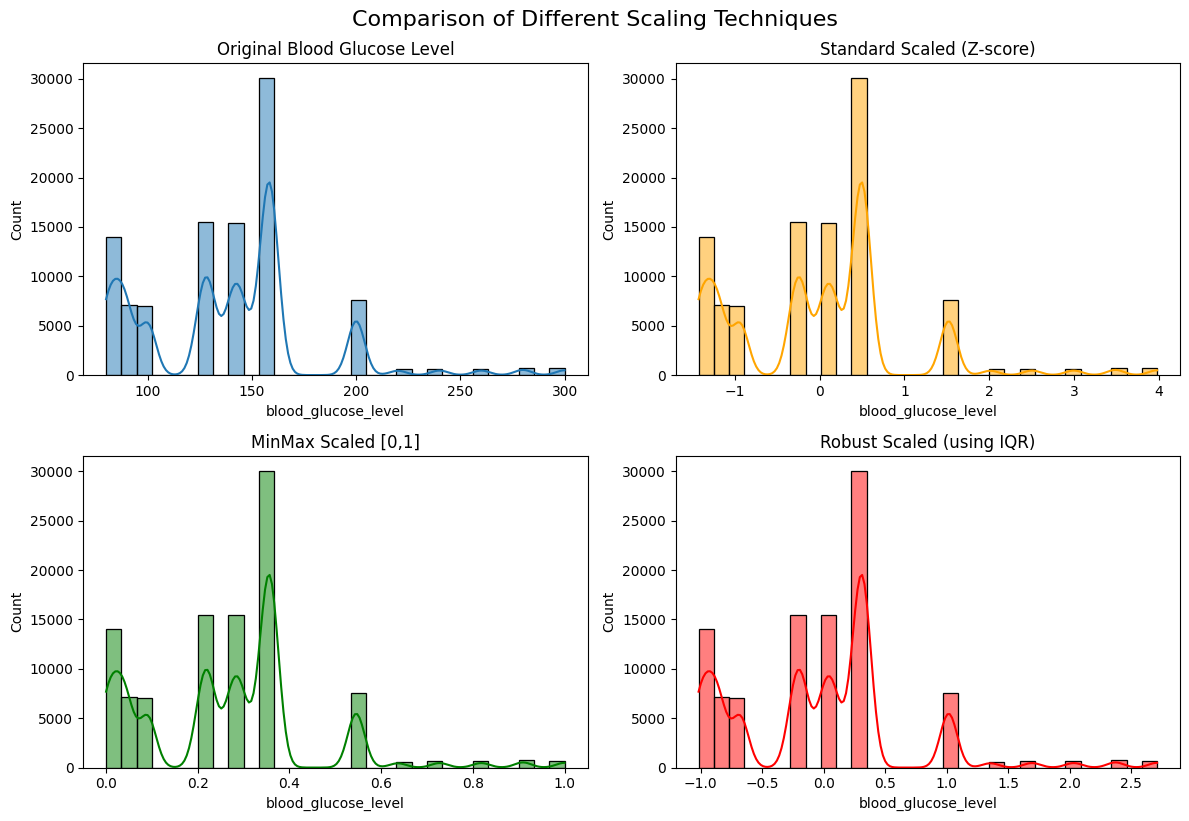

In [ ]:
# Visual comparison of scaling methods (focusing on blood glucose level for clarity)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(X['blood_glucose_level'], bins=30, kde=True)
plt.title('Original Blood Glucose Level')

plt.subplot(2, 2, 2)
sns.histplot(X_standard_scaled['blood_glucose_level'], bins=30, kde=True, color='orange')
plt.title('Standard Scaled (Z-score)')

plt.subplot(2, 2, 3)
sns.histplot(X_minmax_scaled['blood_glucose_level'], bins=30, kde=True, color='green')
plt.title('MinMax Scaled [0,1]')

plt.subplot(2, 2, 4)
sns.histplot(X_robust_scaled['blood_glucose_level'], bins=30, kde=True, color='red')
plt.title('Robust Scaled (using IQR)')

plt.tight_layout()
plt.suptitle('Comparison of Different Scaling Techniques', y=1.02, fontsize=16)

In [ ]:
# Use standard scaling for further analysis
X_scaled = X_standard_scaled.copy()

In [ ]:
# Feature Selection

In [ ]:
# Feature Selection - Correlation Analysis

In [ ]:
correlation_with_target = pd.DataFrame()
correlation_with_target['feature'] = X.columns
correlation_with_target['correlation'] = [X[col].corr(y) for col in X.columns]

correlation_with_target['abs_correlation'] = correlation_with_target['correlation'].abs()
correlation_with_target = correlation_with_target.sort_values('abs_correlation', ascending=False)

print("Correlation with Target Variable (diabetes):")
display(correlation_with_target.head(10))

Correlation with Target Variable (diabetes):


,feature,correlation,abs_correlation
6,blood_glucose_level,0.419558,0.419558
5,HbA1c_level,0.400660,0.400660
1,age,0.258008,0.258008
4,bmi,0.214357,0.214357
2,hypertension,0.197823,0.197823
3,heart_disease,0.171727,0.171727
7,smoking_history_No Info,-0.118939,0.118939
10,smoking_history_former,0.097917,0.097917
0,gender,0.037666,0.037666
11,smoking_history_never,0.027267,0.027267


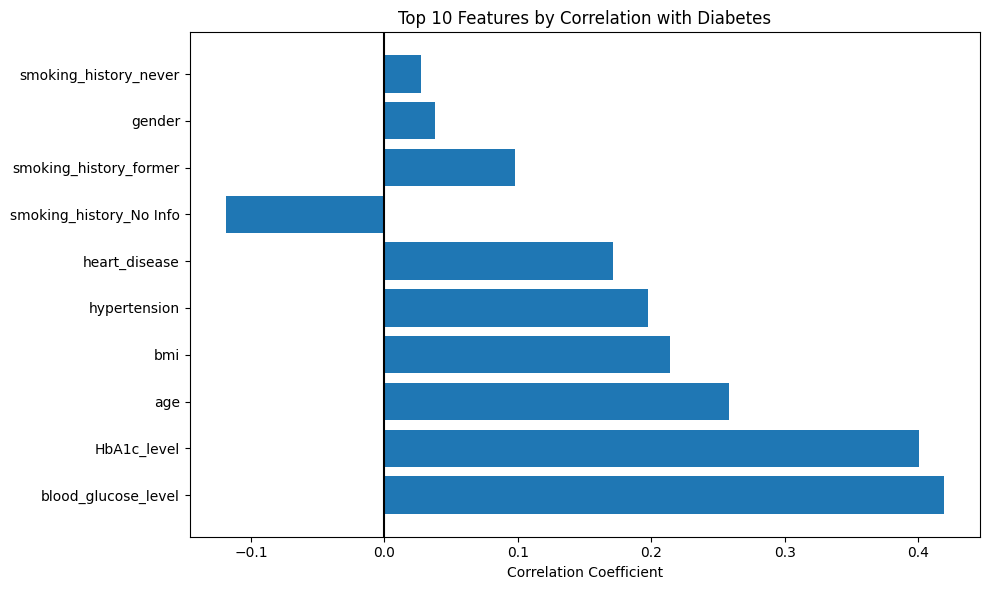

In [ ]:
# Visualize top 10 correlations
plt.figure(figsize=(10, 6))
plt.barh(correlation_with_target['feature'][:10], correlation_with_target['correlation'][:10])
plt.title('Top 10 Features by Correlation with Diabetes')
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-')
plt.tight_layout()

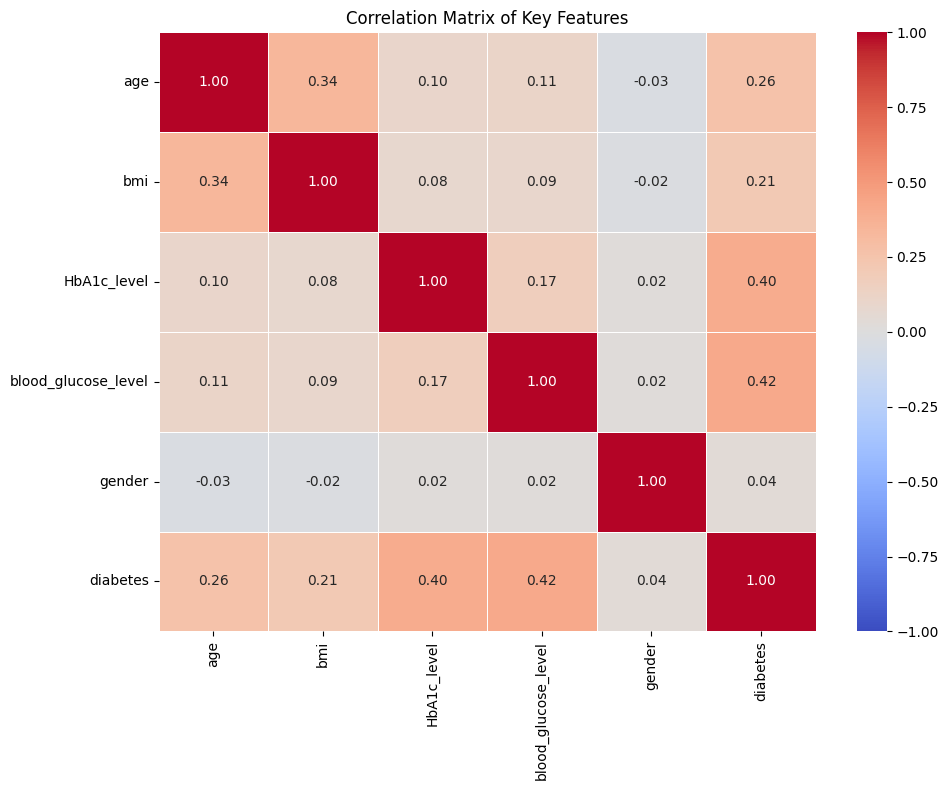

In [ ]:
# Create correlation heatmap for key numerical features
plt.figure(figsize=(10, 8))
key_features = numerical_cols + ['gender', 'diabetes']
corr_matrix = df_processed[key_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()

In [ ]:
# Calculate variance of each feature
feature_variance = pd.DataFrame()
feature_variance['feature'] = X.columns
feature_variance['variance'] = [X[col].var() for col in X.columns]
feature_variance = feature_variance.sort_values('variance', ascending=False)

print("Variance of each feature:")
display(feature_variance)

Variance of each feature:


,feature,variance
6,blood_glucose_level,1657.152341
1,age,507.008078
4,bmi,44.046894
5,HbA1c_level,1.146339
0,gender,0.242658
7,smoking_history_No Info,0.229884
11,smoking_history_never,0.227786
10,smoking_history_former,0.084775
8,smoking_history_current,0.084238
2,hypertension,0.069248


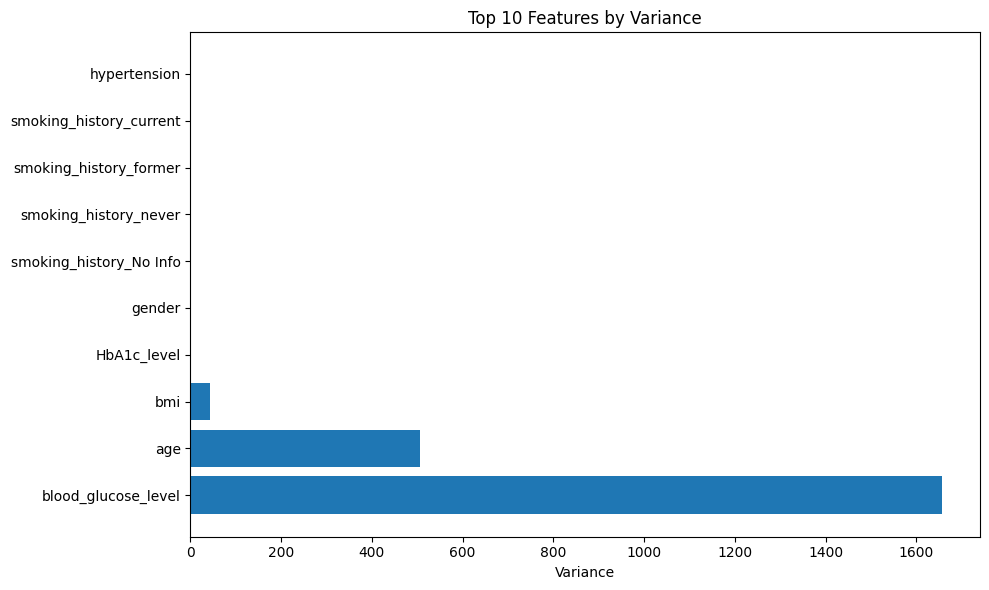

In [ ]:
# Visualize feature variances
plt.figure(figsize=(10, 6))
plt.barh(feature_variance['feature'][:10], feature_variance['variance'][:10])
plt.title('Top 10 Features by Variance')
plt.xlabel('Variance')
plt.tight_layout()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold

threshold = 0.01
selector = VarianceThreshold(threshold)
X_var_selected = selector.fit_transform(X_scaled)

selected_features_var = X_scaled.columns[selector.get_support()]

print(f"Original number of features: {X_scaled.shape[1]}")
print(f"Number of features after variance threshold (>{threshold}): {X_var_selected.shape[1]}")
print("\nSelected features:")
print(selected_features_var.tolist())
print("\nRemoved features:")
print([feature for feature in X_scaled.columns if feature not in selected_features_var])

Original number of features: 13
Number of features after variance threshold (>0.01): 13

Selected features:
['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'smoking_history_No Info', 'smoking_history_current', 'smoking_history_ever', 'smoking_history_former', 'smoking_history_never', 'smoking_history_not current']

Removed features:
[]


In [ ]:
k = 8
selector = SelectKBest(score_func=f_classif, k=k)
X_kbest = selector.fit_transform(X_scaled, y)

unordered_selected_features = X_scaled.columns[selector.get_support()]

feature_scores_df = pd.DataFrame({
    'feature': X_scaled.columns,
    'score': selector.scores_
})
feature_scores_df = feature_scores_df.sort_values('score', ascending=False)

selected_features_kbest = feature_scores_df.loc[feature_scores_df['feature'].isin(unordered_selected_features), 'feature'].tolist()[:k]

feature_scores = pd.DataFrame()
feature_scores['feature'] = X_scaled.columns
feature_scores['score'] = selector.scores_
feature_scores['p_value'] = selector.pvalues_
feature_scores = feature_scores.sort_values('score', ascending=False)

print(f"Top {k} features selected by SelectKBest (f_classif):")
display(feature_scores.head(k))


Top 8 features selected by SelectKBest (f_classif):


,feature,score,p_value
6,blood_glucose_level,21363.054361,0.000000e+00
5,HbA1c_level,19122.211184,0.000000e+00
1,age,7131.405852,0.000000e+00
4,bmi,4816.113932,0.000000e+00
2,hypertension,4072.706875,0.000000e+00
3,heart_disease,3038.559564,0.000000e+00
7,smoking_history_No Info,1434.914124,8.975704e-312
10,smoking_history_former,968.042101,1.636498e-211


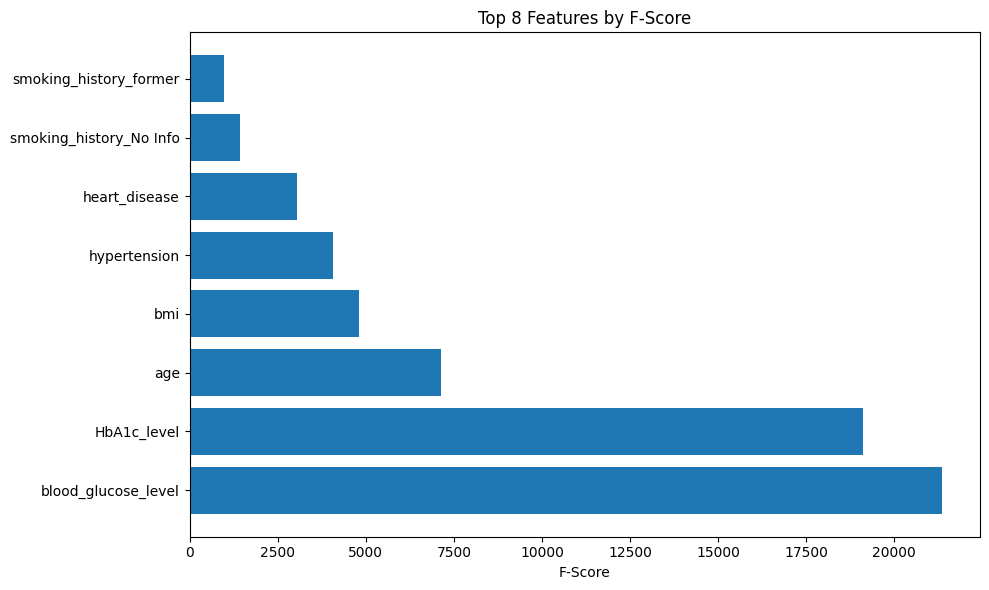

In [ ]:
# Visualize feature scores
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['feature'][:k], feature_scores['score'][:k])
plt.title(f'Top {k} Features by F-Score')
plt.xlabel('F-Score')
plt.tight_layout()

In [ ]:
# Comparing Feature Selection Methods

In [ ]:
top_corr_features = correlation_with_target.iloc[:8]['feature'].tolist()

comparison = pd.DataFrame({
    'Correlation-Based': top_corr_features,
    'F-Statistic-Based': selected_features_kbest,
    'Variance-Based': selected_features_var.tolist()[:8] if len(selected_features_var) >= 8 else selected_features_var.tolist() + [''] * (8-len(selected_features_var))
})

print("Comparison of Features Selected by Different Methods:")
display(comparison)

common_features = set(top_corr_features) & set(selected_features_kbest) & set(selected_features_var)
print("\nFeatures selected by all methods:")
print(common_features)

Comparison of Features Selected by Different Methods:


,Correlation-Based,F-Statistic-Based,Variance-Based
0,blood_glucose_level,blood_glucose_level,gender
1,HbA1c_level,HbA1c_level,age
2,age,age,hypertension
3,bmi,bmi,heart_disease
4,hypertension,hypertension,bmi
5,heart_disease,heart_disease,HbA1c_level
6,smoking_history_No Info,smoking_history_No Info,blood_glucose_level
7,smoking_history_former,smoking_history_former,smoking_history_No Info



Features selected by all methods:
{'HbA1c_level', 'age', 'hypertension', 'blood_glucose_level', 'smoking_history_former', 'smoking_history_No Info', 'heart_disease', 'bmi'}


In [ ]:
# Use the features selected by SelectKBest
final_features = selected_features_kbest
print("Final selected features:")
print(final_features)

# Create the final feature set
X_final = X_scaled[final_features]

Final selected features:
['blood_glucose_level', 'HbA1c_level', 'age', 'bmi', 'hypertension', 'heart_disease', 'smoking_history_No Info', 'smoking_history_former']


In [ ]:
# Model Building with Selected Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification report for a simple logistic regression model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Compare models
print("\nModel Comparison:")
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Model Accuracy: 0.9588

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Random Forest Accuracy: 0.9698

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.94      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.95      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Model Comparison:
Logistic Regression Accuracy: 0.9588
Random Forest Accuracy: 0.9698


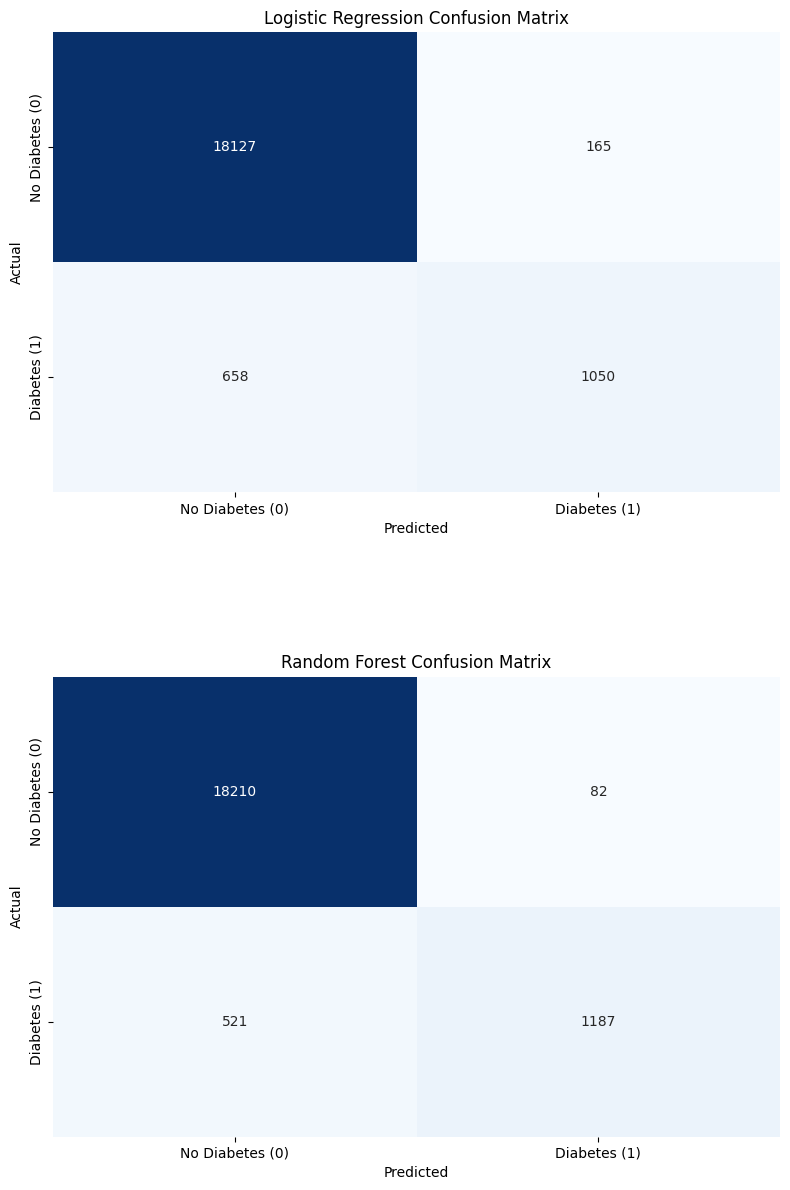

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Logistic Regression Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticks([0.5, 1.5])
axes[0].set_yticks([0.5, 1.5])
axes[0].set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'])
axes[0].set_yticklabels(['No Diabetes (0)', 'Diabetes (1)'])

# Random Forest Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticks([0.5, 1.5])
axes[1].set_yticks([0.5, 1.5])
axes[1].set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'])
axes[1].set_yticklabels(['No Diabetes (0)', 'Diabetes (1)'])

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)